In [1]:
#Домашнее задание к лекции "Базовые понятия статистики"

#Задание 1. Загрузка данных
#Изучить представленный набор данных на основе описания его столбцов 
#оставить 8 столбцов : surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

#Задание 2. Первичное изучение данных
#Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

#Задание 3. Работа с пропусками
#Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [7]:
import pandas as pd
horse_data = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', names = ['surgery', 'age', 'Hospital_Number', 'rectal_temperature',\
                                                    'pulse', 'respiratory_rate', 'temperature_of_extremities', \
                                                    'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time', \
                                                    'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', \
                                                    'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_-_feces',\
                                                    'abdomen', 'packed_cell_volume', 'total_protein', \
                                                    'abdominocentesis_appearance', 'abdomcentesis_total_protein', 'outcome', \
                                                    'surgical_lesion?', 'site_of_lesion', 'type', 'specific_code', 'cp_data'], \
                         sep = ',', header=0, na_values='?')
horse_data = horse_data[['surgery', 'age', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', \
                         'pain', 'outcome']]
horse_data['surgery'] = horse_data.surgery.astype('Int64')
horse_data['pain'] = horse_data.pain.astype('Int64')
horse_data['outcome'] = horse_data.outcome.astype('Int64')
horse_data.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,1,1,39.2,88.0,20.0,NaN,3,3
1,2,1,38.3,40.0,24.0,1.0,3,1
2,1,9,39.1,164.0,84.0,4.0,2,2
3,2,1,37.3,104.0,35.0,NaN,<NA>,2
4,2,1,NaN,NaN,NaN,2.0,2,1


In [12]:
print(horse_data['surgery'].unique())
print(horse_data['age'].unique())
print(horse_data['rectal_temperature'].unique())
print(horse_data['pulse'].unique())
print(horse_data['respiratory_rate'].unique())
print(horse_data['temperature_of_extremities'].unique())
print(horse_data['pain'].unique())
print(horse_data['outcome'].unique())

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64
[1 9]
[39.2 38.3 39.1 37.3  nan 37.9 38.1 37.2 38.  38.2 37.6 37.5 39.4 39.9
 38.4 38.6 37.8 37.7 39.  35.4 38.9 37.4 40.3 38.5 37.  39.7 38.7 36.4
 38.8 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]
[ 88.  40. 164. 104.  nan  48.  60.  80.  90.  66.  72.  42.  92.  76.
  96. 128.  64. 110. 130. 108. 100. 112.  52. 146. 150. 120. 140.  84.
  46. 114. 160.  54.  56.  38.  98.  50.  44.  70.  78.  49.  30. 136.
 132.  65.  86. 129.  68.  36.  45. 124. 184.  75.  82.]
[20. 24. 84. 35. nan 16. 36. 12. 52. 28. 48. 21. 60. 34. 42. 30. 96. 72.
 15. 44. 32. 22. 18. 80. 40. 10. 51. 68. 66.  9. 14. 90.  8. 23. 58. 13.
 70. 26. 88. 25. 50.]
[nan  1.  4.  2.  3.]
<IntegerArray>
[3, 2, <NA>, 4, 5, 1]
Length: 6, dtype: Int64
<IntegerArray>
[3, 1, 2, <NA>]
Length: 4, dtype: Int64


In [13]:
horse_data.describe()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
count,298.000000,299.00000,239.000000,275.000000,241.000000,243.000000,244.000000,298.000000
mean,1.395973,1.64214,38.166527,71.934545,30.427386,2.345679,2.942623,1.550336
std,0.489881,2.17730,0.733508,28.680522,17.678256,1.046369,1.303993,0.737967
min,1.000000,1.00000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.00000,37.800000,48.000000,18.000000,1.000000,2.000000,1.000000
50%,1.000000,1.00000,38.200000,64.000000,24.000000,3.000000,3.000000,1.000000
75%,2.000000,1.00000,38.500000,88.000000,36.000000,3.000000,4.000000,2.000000
max,2.000000,9.00000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [14]:
# Моды
print('Операция:', horse_data['surgery'].mode()[0])
print('Возраст:', horse_data['age'].mode()[0])
print('Ректальная температура:', horse_data['rectal_temperature'].mode()[0])
print('Пульс:', horse_data['pulse'].mode()[0])
print('Частота дыхания:', horse_data['respiratory_rate'].mode()[0])
print('Температура конечностей:', horse_data['temperature_of_extremities'].mode()[0])
print('Боль:', horse_data['pain'].mode()[0])
print('Результат:', horse_data['outcome'].mode()[0])

Операция: 1
Возраст: 1
Ректальная температура: 38.0
Пульс: 48.0
Частота дыхания: 20.0
Температура конечностей: 3.0
Боль: 3
Результат: 1


In [15]:
# Дисперсии
print('Операция:', horse_data['surgery'].var())
print('Возраст:', horse_data['age'].var())
print('Ректальная температура:', horse_data['rectal_temperature'].var())
print('Пульс:', horse_data['pulse'].var())
print('Частота дыхания:', horse_data['respiratory_rate'].var())
print('Температура конечностей:', horse_data['temperature_of_extremities'].var())
print('Боль:', horse_data['pain'].var())
print('Результат:', horse_data['outcome'].var())

Операция: 0.23998372991661587
Возраст: 4.740634329195755
Ректальная температура: 0.5380345276185787
Пульс: 822.5723424021243
Частота дыхания: 312.5207468879668
Температура конечностей: 1.09488827670646
Боль: 1.7003980300883765
Результат: 0.5445958466092694


In [28]:
#Квантили
Q1_surgery = horse_data['surgery'].quantile(0.25)
Q3_surgery = horse_data['surgery'].quantile(0.75)
IQR_surgery = Q3_surgery - Q1_surgery
print('Операция:', IQR_surgery)


Q1_age = horse_data['age'].quantile(0.25)
Q3_age = horse_data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
print('Возраст:', IQR_age)

Q1_rectal_temperature = horse_data['rectal_temperature'].quantile(0.25)
Q3_rectal_temperature = horse_data['rectal_temperature'].quantile(0.75)
IQR_rectal_temperature = Q3_rectal_temperature - Q1_rectal_temperature
print('Ректальная температура:', IQR_rectal_temperature)

Q1_pulse = horse_data['pulse'].quantile(0.25)
Q3_pulse = horse_data['pulse'].quantile(0.75)
IQR_pulse = Q3_pulse - Q1_pulse
print('Пульс:', IQR_pulse)
print(Q1_pulse)
print(Q3_pulse)

Q1_respiratory_rate = horse_data['respiratory_rate'].quantile(0.25)
Q3_respiratory_rate = horse_data['respiratory_rate'].quantile(0.75)
IQR_respiratory_rate = Q3_respiratory_rate - Q1_respiratory_rate
print('Частота дыхания:', IQR_respiratory_rate)

Q1_temperature_of_extremities = horse_data['temperature_of_extremities'].quantile(0.25)
Q3_temperature_of_extremities = horse_data['temperature_of_extremities'].quantile(0.75)
IQR_temperature_of_extremities = Q3_temperature_of_extremities - Q1_temperature_of_extremities
print('Температура конечностей:', IQR_temperature_of_extremities)

Q1_pain = horse_data['pain'].quantile(0.25)
Q3_pain = horse_data['pain'].quantile(0.75)
IQR_pain = Q3_pain - Q1_pain
print('Боль:', IQR_pain)

Q1_outcome = horse_data['outcome'].quantile(0.25)
Q3_outcome = horse_data['outcome'].quantile(0.75)
IQR_outcome = Q3_outcome - Q1_outcome
print('Результат:', IQR_outcome)

Операция: 1
Возраст: 0.0
Ректальная температура: 0.7000000000000028
Пульс: 40.0
48.0
88.0
Частота дыхания: 18.0
Температура конечностей: 2.0
Боль: 2
Результат: 1


In [27]:
lower_bound_surgery = Q1_surgery - (1.5 * IQR_surgery) 
upper_bound_surgery = Q3_surgery + (1.5 * IQR_surgery)
#remove_outliers_surgery = horse_data[horse_data['surgery']\
 #                                    .between(lower_bound_surgery, upper_bound_surgery, inclusive=True)].sort_values('outcome')
outliers_surgery = pd.concat([horse_data, remove_outliers_surgery]).drop_duplicates(keep=False)
outliers_surgery.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
131,<NA>,1,38.0,48.0,20.0,3.0,4,<NA>


<AxesSubplot:>

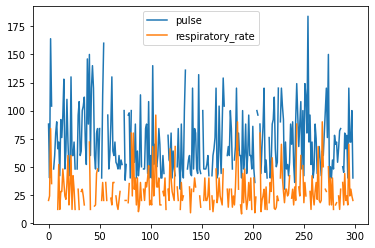

In [40]:
#Значения Пульса и частота дыхания вызвали больше внимания, для удобства анализа, выведем на простенькой гистограмме
horse_data.plot( y=["pulse", "respiratory_rate"])

Видим, что значения сильно выбивающиеся действительно есть, в частности максимальное значение среди значений Пульс

# Задание 3 Работа с пропусками

In [31]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     298 non-null    Int64  
 1   age                         299 non-null    int64  
 2   rectal_temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory_rate            241 non-null    float64
 5   temperature_of_extremities  243 non-null    float64
 6   pain                        244 non-null    Int64  
 7   outcome                     298 non-null    Int64  
dtypes: Int64(3), float64(4), int64(1)
memory usage: 19.7 KB


Видим, что практически в каждом стобце есть пробелы в значениях, однако действия по заполнению будут различны.
Например: в столбцах "surgery" и "outcome" не хватает всего по 1 значению. Моды в этих столбцах приближены к остальным признаки приближены к модам этих признаков всего датафрейма - заполняем их модальными значениями.

In [32]:
horse_data['surgery'].fillna(horse_data['surgery'].mode()[0], inplace=True)
print(horse_data['surgery'].isna().sum())
print(horse_data['surgery'].unique())

horse_data['outcome'].fillna(horse_data['outcome'].mode()[0], inplace=True)
print(horse_data['outcome'].isna().sum())
print(horse_data['outcome'].unique())

0
<IntegerArray>
[1, 2]
Length: 2, dtype: Int64
0
<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64


Проверим чем будем заполнить значения в столбце "pain"

In [34]:
fill_median = horse_data

fill_median['pain'].fillna(horse_data['pain'].median(), inplace=True)
print(fill_median['pain'].describe())

count    299.000000
mean       2.953177
std        1.177736
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: pain, dtype: float64


In [37]:
fill_moda = horse_data

fill_moda['pain'].fillna(horse_data['pain'].mode()[0], inplace=True)
print(fill_moda['pain'].describe())

count    299.000000
mean       2.953177
std        1.177736
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: pain, dtype: float64


In [ ]:
Видим, что в независимости о того чем заполнять (модой или медианой), общие характеристики набора данных не меняются. Поэтому можно заполнить модой

In [38]:
horse_data['pain'].fillna(horse_data['pain'].mode()[0], inplace=True)
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    Int64  
 1   age                         299 non-null    int64  
 2   rectal_temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory_rate            241 non-null    float64
 5   temperature_of_extremities  243 non-null    float64
 6   pain                        299 non-null    Int64  
 7   outcome                     299 non-null    Int64  
dtypes: Int64(3), float64(4), int64(1)
memory usage: 19.7 KB


В данных столбцах есть выбросы, которые мы оставляем. Соответственно заполняем пропуски в этих столбцах медианами в разрезе категориальных признаков.

In [42]:
horse_data['rectal_temperature'].fillna(horse_data.groupby(['surgery', 'age'])['rectal_temperature'].transform('median'), inplace=True)
horse_data['pulse'].fillna(horse_data.groupby(['pain', 'age'])['pulse'].transform('median'), inplace=True)
horse_data['temperature_of_extremities'].fillna(horse_data.groupby(['age', 'outcome'])['temperature_of_extremities'].transform('median'), inplace=True)
horse_data['respiratory_rate'].fillna(horse_data.groupby(['outcome', 'age'])['respiratory_rate'].transform('median'), inplace=True)
horse_data['respiratory_rate'].fillna(horse_data['respiratory_rate'].median(), inplace=True)
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    Int64  
 1   age                         299 non-null    int64  
 2   rectal_temperature          299 non-null    float64
 3   pulse                       299 non-null    float64
 4   respiratory_rate            299 non-null    float64
 5   temperature_of_extremities  299 non-null    float64
 6   pain                        299 non-null    Int64  
 7   outcome                     299 non-null    Int64  
dtypes: Int64(3), float64(4), int64(1)
memory usage: 19.7 KB
